Car- Logistic

<img src='th.jpeg'>

In [1]:
#Data Mining
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('car.csv')

In [3]:
df.sample(5)

,User ID,Gender,Age,AnnualSalary,Purchased
275,641,Male,35,116500,0
373,47,Female,48,48500,0
272,941,Female,34,150500,1
366,514,Female,34,72000,0
748,939,Female,55,27500,1


In [4]:
#Data Cleaning
df.isnull().any()

User ID         False
Gender          False
Age             False
AnnualSalary    False
Purchased       False
dtype: bool

In [5]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [7]:
#Redundant Data
df.drop('User ID' ,axis='columns', inplace=True)

In [8]:
df

,Gender,Age,AnnualSalary,Purchased
0,Male,35,20000,0
1,Male,40,43500,0
2,Male,49,74000,0
3,Male,40,107500,1
4,Male,25,79000,0
...,...,...,...,...
995,Male,38,59000,0
996,Female,47,23500,0
997,Female,28,138500,1
998,Female,48,134000,1


In [9]:
#Data Curation
#Female: 0
#Male:1

In [10]:
df['Gender'].replace({'Female':0, 'Male':1}, inplace=True)

In [11]:
df.sample(10)

,Gender,Age,AnnualSalary,Purchased
4,1,25,79000,0
235,0,40,76500,1
655,0,41,115500,1
156,0,32,16500,0
855,0,60,108000,1
342,0,48,51500,1
573,0,42,61500,0
723,0,38,62500,0
492,0,56,126500,1
666,0,37,76500,0


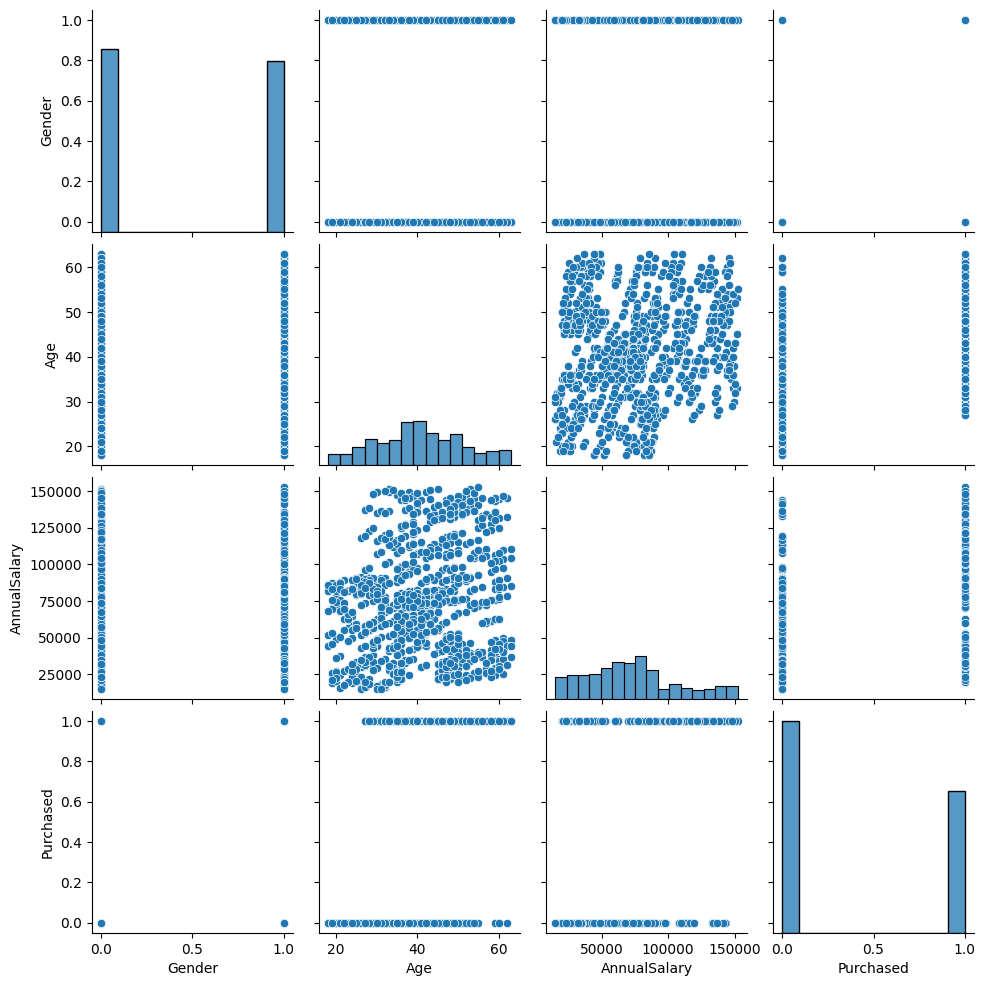

In [12]:
sns.pairplot(df)

In [13]:
df.sample()

,Gender,Age,AnnualSalary,Purchased
210,0,54,144500,1


In [104]:
from sklearn.model_selection import train_test_split

In [105]:
x_train, x_test, y_train, y_test = train_test_split(df[['Gender', 'Age','AnnualSalary']], df['Purchased'])

In [106]:
x_train

,Gender,Age,AnnualSalary
256,0,57,110500
947,1,51,76500
694,1,39,101500
131,1,40,76500
655,0,41,115500
...,...,...,...
996,0,47,23500
982,1,39,60500
448,0,26,72000
476,1,35,79000


In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
model = LogisticRegression()

In [18]:
x = df[['Gender', 'Age','AnnualSalary']]
y = df['Purchased']
model.fit(x, y)

LogisticRegression()

In [118]:
model.predict(x_test)

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [121]:
#male, 35year,20000
model.predict([[0, 45, 150000]])

C:\Users\s_nas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [122]:
model.score(x_test,y_test)

0.528

In [123]:
#Slope (m)
model.coef_

array([[-7.20706471e-04, -9.59322438e-03,  3.42737093e-06]])

In [124]:
x_train.sample()

,Gender,Age,AnnualSalary
29,0,38,147500


In [125]:
#Intercept (c)
model.intercept_

array([-0.00117166])

Sigmoid Function

In [126]:
#1/(1+e^-x)
def sigm(a):
    import math
    return 1/(1+math.e ** (-a))
    

In [132]:
def pred_f(b,c,d):
    m = -7.20706471e-04*b+-9.59322438e-03*c+3.42737093e-06*d+(-0.00117166)
    n = sigm(m)
    return n

In [135]:
#model.predict([[0, 45, 150000]])
b = 0
c = 45
d = 50000

round(pred_f(b,c,d))

0

In [131]:
model.predict([[0, 45, 50000]])

C:\Users\s_nas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [143]:
#-7.20706471e-04, -9.59322438e-03,  3.42737093e-06
#1/(1+e^-x)
def si(a):
    import math
    return (1/(1+math.e**(-a)))

def pred_y(gender,age,salary):
    y = -7.20706471e-04*gender+-9.59322438e-03*age+3.42737093e-06*salary+-0.00117166
    z = si(y)
    return z

In [145]:
gender=0
age=45
salary=145000

round(pred_y(gender,age,salary))

1